https://github.com/ultralytics/yolov5

Импортируем репозиторий

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


Перейдем в репозиторий

In [2]:
%cd yolov5

/Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/yolov5


In [3]:
!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

HEAD is now at fbe67e4 Fix `OMP_NUM_THREADS=1` for macOS (#8624)


Установим зависимости

In [4]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.0 CPU


Создадим папку для данных

In [1]:
%cd ..

/Users/pavelevayun/PycharmProjects/Project_DA_ML


In [6]:
!mkdir cat_open_image

mkdir: cat_open_image: File exists


Перейдем в папку данных

In [7]:
%cd cat_open_image

/Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/cat_open_image


Скачаем архив данных

The Oxford-IIIT Pet Dataset is a 37 category pet dataset with roughly 200 images for each class created by the Visual Geometry Group at Oxford. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed, head ROI, and pixel level trimap segmentation.

In [8]:
!curl -L "https://public.roboflow.com/ds/Sg9zMl9R1N?key=rOEZw1H9V7" > pets.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1071      0 --:--:-- --:--:-- --:--:--  1076
100  109M  100  109M    0     0  8791k      0  0:00:12  0:00:12 --:--:-- 9762k


Распакуем архив

In [ ]:
!unzip pets.zip

Удалим архив

In [10]:
!rm pets.zip

In [11]:
%cat data.yaml

train: ../cat_open_image/train/images
val: ../cat_open_image/valid/images

nc: 2
names: ['cat', 'dog']

Пути к данным для yaml конфигурации

In [12]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [13]:
num_classes

'2'

In [7]:
%cd Task63_YOLA
%cd yolov5
%cat models/yolov5s.yaml

/Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA
/Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/yolov5
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3,

In [ ]:
%cd /Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/yolov5/
path = os.getcwd()
path

Запустим обучение

In [11]:
#  train yolov5s on custom data for 10 epochs
# time its performance
# %%time
%cd /Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA
!python3 yolov5/train.py --img 416 --batch 16 --epochs 10 --data cat_open_image/data.yaml --cfg yolov5/models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

/Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA
train: weights=, cfg=yolov5/models/yolov5s.yaml, data=cat_open_image/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 611 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.10 torch-2.1.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.

       0/9        0G   0.08407    0.0244   0.02584        36       416: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738    0.00152      0.456    0.00127   0.000334

     Epoch   gpu_mem       box       obj       cls    labels  img_size
       1/9        0G   0.07767   0.02519   0.02396        37       416: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738    0.00175      0.474    0.00205   0.000536

     Epoch   gpu_mem       box       obj       cls    labels  img_size
       2/9        0G   0.07501    0.0258   0.02357        39       416: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738    0.00235      0.708     0.0028   0.000813

     Epoch   gpu_mem       box       obj       cls    labels  img_size
       3/9        0G   0.07048   0.02

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        736        738      0.567      0.522      0.561      0.227
                 cat        736        251      0.665      0.386      0.533      0.227
                 dog        736        487      0.468      0.657       0.59      0.227
Results saved to yolov5/runs/train/yolov5s_results12


Запустим скрипт обработки изображения

In [35]:
img = 'american_bulldog_128_jpg.rf.817f8f5abd38a48c403db7c73a9d0060.jpg'

In [33]:
!python3 yolov5/detect.py --weights yolov5/runs/train/yolov5s_results12/weights/best.pt --source /Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/cat_open_image/test/images/american_bulldog_128_jpg.rf.817f8f5abd38a48c403db7c73a9d0060.jpg


detect: weights=['yolov5/runs/train/yolov5s_results12/weights/best.pt'], source=/Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/cat_open_image/test/images/american_bulldog_128_jpg.rf.817f8f5abd38a48c403db7c73a9d0060.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-306-gfbe67e4 Python-3.10.10 torch-2.1.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/cat_open_image/test/images/american_bulldog_128_jpg.rf.817f8f5abd38a48c403db7c73a9d0060.jpg: 384x640 1 dog, Done. (0.088s)
Speed: 0.9ms pre-process, 

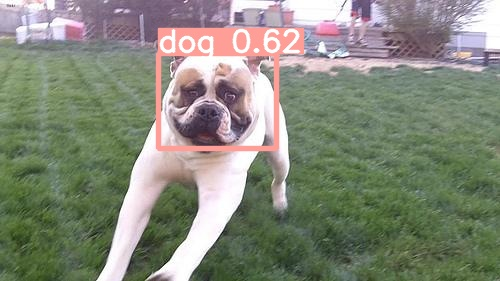

In [34]:
from IPython.display import Image
Image ("/Users/pavelevayun/PycharmProjects/Project_DA_ML/Task63_YOLA/yolov5/runs/detect/exp5/american_bulldog_128_jpg.rf.817f8f5abd38a48c403db7c73a9d0060.jpg", width=320, height=240)